In [ ]:
#Heat Map - team and more imporantly per player

In [202]:
import pandas as pd
import json

# load JSON data
with open('StatsBomb/StatsBomb/Data/ManCity_Arsenal_events.json') as file:
    data = json.load(file)
with open('StatsBomb/StatsBomb/Data/ManCity_AstonVilla_lineups.json') as file:
    lineup_data = json.load(file)
# extract event data and flatten nested columns
events = []
for event in data:
    flattened_event = {
        "id": event.get("id"),
        "index": event.get("index"),
        "period": event.get("period"),
        "timestamp": event.get("timestamp"),
        "minute": event.get("minute"),
        "second": event.get("second"),
        "type": event["type"].get("name"),
        "possession": event.get("possession"),
        "possession_team": event["possession_team"].get("name"),
        "play_pattern": event["play_pattern"].get("name"),
        "team": event["team"].get("name"),
        "player": event["player"].get("name") if "player" in event else None,
        "position": event["position"].get("name") if "position" in event else None,
        "location_x": event.get("location")[0] if "location" in event else None,
        "location_y": event.get("location")[1] if "location" in event else None,
        "duration": event.get("duration"),
        "under_pressure": event.get("under_pressure"),
        "off_camera": event.get("off_camera"),
        "out": event.get("out"),
        "related_events": event.get("related_events"),
        "tactics": event.get("tactics"),
        "obv_for_after": event.get("obv_for_after"),
        "obv_for_before": event.get("obv_for_before"),
        "obv_for_net": event.get("obv_for_net"),
        "obv_against_after": event.get("obv_against_after"),
        "obv_against_before": event.get("obv_against_before"),
        "obv_against_net": event.get("obv_against_net"),
        "obv_total_net": event.get("obv_total_net")
    }
    events.append(flattened_event)

# create pandas dataframe
df = pd.DataFrame(events)

df_all = pd.json_normalize(data)

In [101]:
pd.set_option("display.max.columns",None)
df_all


,id,index,period,timestamp,minute,second,possession,obv_for_after,obv_for_before,obv_for_net,obv_against_after,obv_against_before,obv_against_net,obv_total_net,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.type.id,pass.type.name,pass.body_part.id,pass.body_part.name,carry.end_location,under_pressure,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,counterpress,duel.type.id,duel.type.name,miscontrol.aerial_won,pass.aerial_won,dribble.outcome.id,dribble.outcome.name,pass.switch,interception.outcome.id,interception.outcome.name,shot.statsbomb_xg,shot.end_location,shot.outcome.id,shot.outcome.name,shot.technique.id,shot.technique.name,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.freeze_frame,goalkeeper.end_location,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.type.id,goalkeeper.type.name,off_camera,clearance.head,clearance.body_part.id,clearance.body_part.name,dribble.nutmeg,out,ball_recovery.recovery_failure,pass.cross,pass.xclaim,clearance.left_foot,pass.assisted_shot_id,pass.goal_assist,shot.open_goal,shot.statsbomb_xg2,shot.key_pass_id,shot.first_time,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.technique.id,goalkeeper.technique.name,pass.through_ball,pass.technique.id,pass.technique.name,pass.shot_assist,goalkeeper.body_part.id,goalkeeper.body_part.name,shot.aerial_won,duel.outcome.id,duel.outcome.name,foul_won.defensive,clearance.right_foot,pass.straight,shot.one_on_one,50_50.outcome.id,50_50.outcome.name,injury_stoppage.in_chain,dribble.no_touch,clearance.aerial_won,foul_committed.advantage,foul_won.advantage,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,pass.inswinging,foul_committed.card.id,foul_committed.card.name,bad_behaviour.card.id,bad_behaviour.card.name,pass.miscommunication,pass.cut_back,dribble.overrun,pass.outswinging
0,5ab3a8e3-e6e1-4a94-b057-57b2301abac5,1,1,00:00:00.000,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,35,Starting XI,746,Manchester City WFC,1,Regular Play,746,Manchester City WFC,433.0,"[{'player': {'id': 4637, 'name': 'Ellie Roebuc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15347fb5-bd07-47c7-9331-b5d0d6901847,2,1,00:00:00.000,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,35,Starting XI,746,Manchester City WFC,1,Regular Play,968,Arsenal WFC,343.0,"[{'player': {'id': 10237, 'name': 'Manuela Zin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7b3793be-f0aa-40b5-aedf-e2ec45e43069,3,1,00:00:00.000,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,18,Half Start,746,Manchester City WFC,1,Regular Play,746,Manchester City WFC,NaN,NaN,[b3f6b437-6189-49a7-84b3-06992c851d5d],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [245]:
lineup1 = df_all['tactics.lineup'][0]
numbers = pd.json_normalize(lineup1)
numbers = numbers[['player.name', 'jersey_number']]
numbers.columns = ['player', 'number']
numbers

,player,number
0,Ellie Roebuck,1
1,Kerstin Yasmijn Casparij,2
2,Stephanie Houghton,6
3,Alex Greenwood,5
4,Laia Aleixandri LÃ³pez,4
5,Yui Hasegawa,25
6,Ingrid Filippa Angeldal,12
7,Laura Coombs,7
8,Chloe Kelly,9
9,Lauren Hemp,11


In [80]:
df.head(10)

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,out,related_events,tactics,obv_for_after,obv_for_before,obv_for_net,obv_against_after,obv_against_before,obv_against_net,obv_total_net
0,5ab3a8e3-e6e1-4a94-b057-57b2301abac5,1,1,00:00:00.000,0,0,Starting XI,1,Manchester City WFC,Regular Play,...,None,None,"{'formation': 433, 'lineup': [{'player': {'id'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15347fb5-bd07-47c7-9331-b5d0d6901847,2,1,00:00:00.000,0,0,Starting XI,1,Manchester City WFC,Regular Play,...,None,None,"{'formation': 343, 'lineup': [{'player': {'id'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7b3793be-f0aa-40b5-aedf-e2ec45e43069,3,1,00:00:00.000,0,0,Half Start,1,Manchester City WFC,Regular Play,...,None,[b3f6b437-6189-49a7-84b3-06992c851d5d],None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b3f6b437-6189-49a7-84b3-06992c851d5d,4,1,00:00:00.000,0,0,Half Start,1,Manchester City WFC,Regular Play,...,None,[7b3793be-f0aa-40b5-aedf-e2ec45e43069],None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,edbc9819-3d24-4c37-adc0-06949261903b,5,1,00:00:00.280,0,0,Pass,2,Manchester City WFC,From Kick Off,...,None,[d951ed07-53b6-412b-9e50-5317a66a7396],None,0.015265,0.007439,0.007826,0.009969,0.008581,0.001388,0.006438
5,d951ed07-53b6-412b-9e50-5317a66a7396,6,1,00:00:01.292,0,1,Ball Receipt*,2,Manchester City WFC,From Kick Off,...,None,[edbc9819-3d24-4c37-adc0-06949261903b],None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ce398ea2-769b-43d0-8911-a71d6ad7ce82,7,1,00:00:01.292,0,1,Carry,2,Manchester City WFC,From Kick Off,...,None,"[9fdba1c7-4244-43fd-b0fc-b6f944407c1f, d951ed0...",None,0.015399,0.015265,0.000133,0.009946,0.009969,-0.000023,0.000157
7,9fdba1c7-4244-43fd-b0fc-b6f944407c1f,8,1,00:00:02.470,0,2,Pass,2,Manchester City WFC,From Kick Off,...,None,[bc80bce1-2601-4654-aeb2-97dc87c2fee2],None,0.013102,0.015399,-0.002296,0.011074,0.009946,0.001129,-0.003425
8,bc80bce1-2601-4654-aeb2-97dc87c2fee2,9,1,00:00:03.819,0,3,Ball Receipt*,2,Manchester City WFC,From Kick Off,...,None,[9fdba1c7-4244-43fd-b0fc-b6f944407c1f],None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,389e5373-3b6c-4e80-9ac7-93af4f9166b2,10,1,00:00:03.819,0,3,Carry,2,Manchester City WFC,From Kick Off,...,None,"[5d28c41f-657c-4b5d-8c7d-6975ae7071eb, bc80bce...",None,0.013102,0.013102,0.000000,0.011074,0.011074,0.000000,0.000000


TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

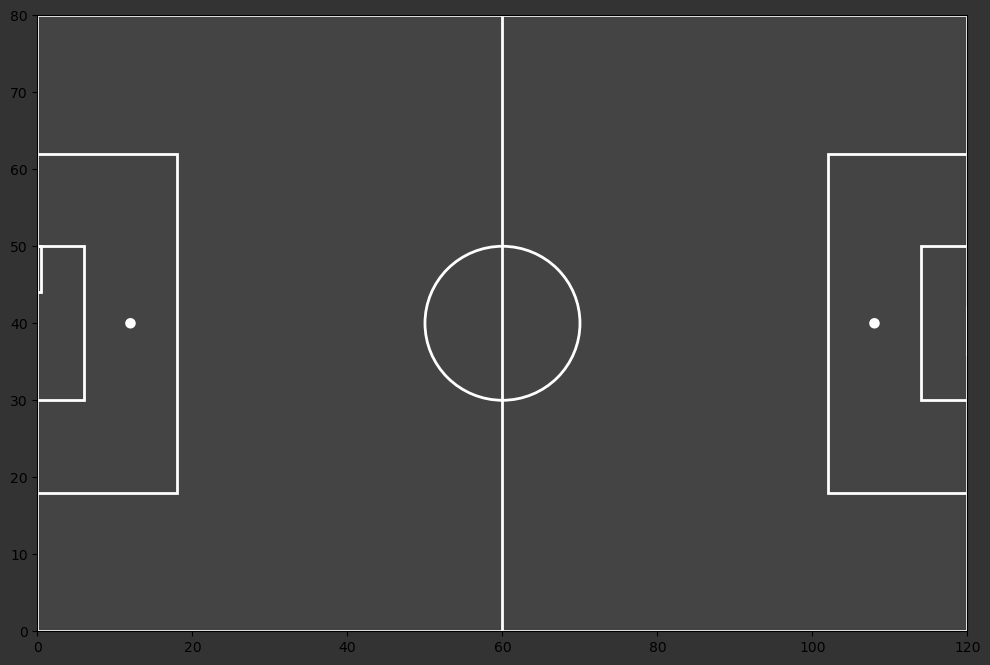

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import pandas as pd

# Set the color palette
sns.set_palette('dark')

# Filter for passes in first half
passes = df.loc[(df['type'] == 'Pass') & (df['period'] == 1) & (df['possession_team'] == 'Arsenal WFC')]

# Define pitch dimensions
pitchLengthX = 120
pitchWidthY = 80

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set background color to dark grey
fig.patch.set_facecolor('#333333')

# Draw field with lighter grey
rect = plt.Rectangle((0, 0), pitchLengthX, pitchWidthY, edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
ax.add_patch(rect)

# Draw midfield line and center circle with white color
ax.plot([60, 60], [0, 80], color='white', linewidth=2)
circle = plt.Circle((60, 40), 10, edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
ax.add_patch(circle)

# Draw penalty areas and goal areas with white color
leftPenalty = plt.Polygon([(0, 18), (18, 18), (18, 62), (0, 62)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
rightPenalty = plt.Polygon([(120, 18), (102, 18), (102, 62), (120, 62)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
leftGoal = plt.Polygon([(0, 30), (6, 30), (6, 50), (0, 50)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
rightGoal = plt.Polygon([(120, 30), (114, 30), (114, 50), (120, 50)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
ax.add_patch(leftPenalty)
ax.add_patch(rightPenalty)
ax.add_patch(leftGoal)
ax.add_patch(rightGoal)

# Draw goals with white color
leftPost = plt.Rectangle((0, 44), 0.5, 6, edgecolor='white', facecolor='none', zorder=1, linewidth=2)
rightPost = plt.Rectangle((120, 36), 0.5, 6, edgecolor='white', facecolor='none', zorder=1, linewidth=2)
ax.add_patch(leftPost)
ax.add_patch(rightPost)

# Draw penalty spots with white color
leftPenaltySpot = plt.Circle((12, 40), 0.5, edgecolor='white', facecolor='white', zorder=1, linewidth=2)
rightPenaltySpot = plt.Circle((108, 40), 0.5, edgecolor='white', facecolor='white', zorder=1, linewidth=2)
ax.add_patch(leftPenaltySpot)
ax.add_patch(rightPenaltySpot)

# Set the limits of the pitch
ax.set_xlim([0, pitchLengthX])
ax.set_ylim([0, pitchWidthY])

# Create heatmap
pitch = sns.kdeplot(passes['location_x'], passes['location_y'], cmap='YlGnBu_r', shade=True, alpha=0.8, levels=50, zorder=2, ax=ax)

# Add arrow
arrow = ax.annotate("Attacking Direction",
                     xy=(110, 40),
                     xytext=(60, 40),
                     arrowprops=dict(arrowstyle="-|>", color="white", linewidth=2, mutation_scale=20),
                     ha='center', va='center', fontsize=14, color='white')

# Add path effect to arrow
arrow.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])

# Add colorbar
cb = fig.colorbar(pitch.collections[0], ax=ax)
cb.ax.set_facecolor('#202020')
cb.ax.yaxis.set_tick_params(color='white')
cb.outline.set_edgecolor('white')
cb.ax.tick_params(labelsize=12, length=0, color='white', labelcolor='white', width=2)

# Set plot title
ax.set_title('Match Summary', fontsize=26, fontweight='bold', y=1.08, color='white')

# Remove ticks and axis labels
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [20]:
import json
import pandas as pd

# Read JSON file


# Extract data from nested 'shot' value
shots = []
for event in data:
    if event["type"]["name"] == "Shot":
        shot_data = {
            "team": event["possession_team"]["name"],
            "player": event["player"]["name"],
            "x": event["location"][0],
            "y": event["location"][1],
            "outcome": event["shot"]["outcome"]["name"],
            "statsbomb_xg": event["shot"]["statsbomb_xg"],
            "aerial_won": event["shot"].get("aerial_won"),
            "follows_dribble": event["shot"].get("follows_dribble"),
            "first_time": event["shot"].get("first_time"),
            "open_goal": event["shot"].get("open_goal"),
            "one_on_one": event["shot"].get("one_on_one"),
            "deflected": event["shot"].get("deflected"),
            "technique": event["shot"]["technique"]["name"],
            "shot_shot_assist": event["shot"].get("shot_assist"),
            "shot_goal_assist": event["shot"].get("goal_assist"),
            "body_part": event["shot"]["body_part"]["name"],
            "type": event["type"]["name"],
            "period": event["period"]
        }
        shots.append(shot_data)

# Create DataFrame from extracted data
shots_df = pd.DataFrame(shots)

# Display DataFrame
print(shots_df)



                   team                         player      x     y  outcome  \
0   Manchester City WFC                   Frida Maanum   91.0  39.6    Off T   
1   Manchester City WFC                    Lauren Hemp  116.7  36.9     Goal   
2           Arsenal WFC             Caitlin Jade Foord  114.9  29.7    Off T   
3           Arsenal WFC                     Kim Little   92.7  41.4    Saved   
4   Manchester City WFC            Khadija Monifa Shaw  109.1  33.1  Wayward   
5   Manchester City WFC                   Yui Hasegawa  100.4  58.1    Off T   
6   Manchester City WFC         Laia Aleixandri LÃ³pez  112.8  32.7    Off T   
7   Manchester City WFC            Khadija Monifa Shaw  107.7  46.5    Saved   
8           Arsenal WFC                    Chloe Kelly  111.3  55.9    Saved   
9   Manchester City WFC        Ingrid Filippa Angeldal   97.9  27.5    Saved   
10  Manchester City WFC                    Chloe Kelly  109.5  57.7  Blocked   
11  Manchester City WFC                 

## Creating pitch

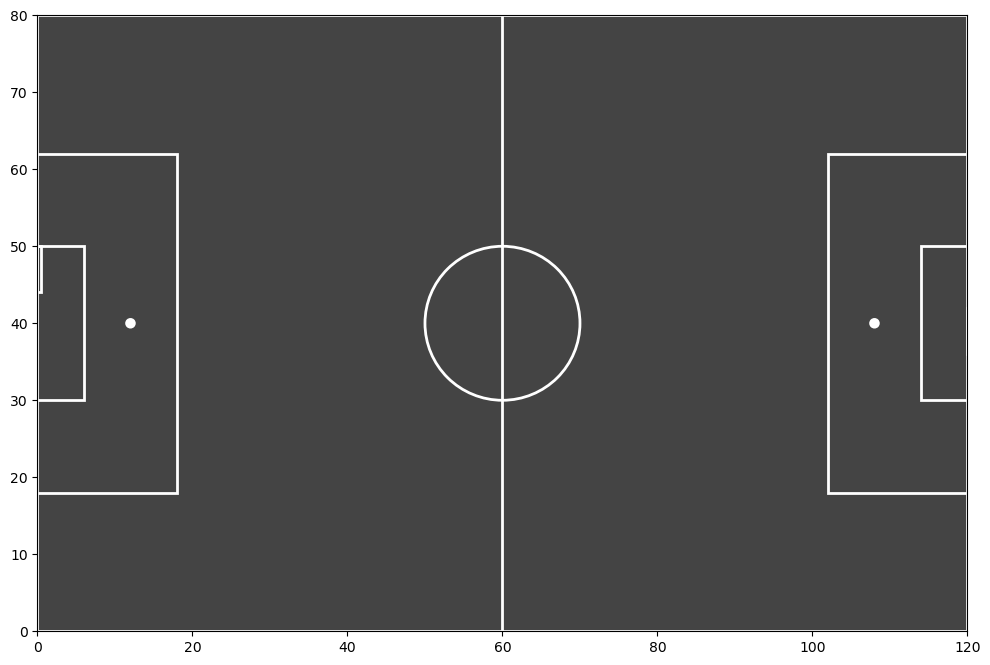

In [18]:
import matplotlib.pyplot as plt

def draw_pitch(ax, pitchLengthX=120, pitchWidthY=80, linecolor='white', fieldcolor='#444444'):
    # Set background color to dark grey
    ax.patch.set_facecolor('#333333')

    # Draw field with lighter grey
    rect = plt.Rectangle((0, 0), pitchLengthX, pitchWidthY, edgecolor=linecolor, facecolor=fieldcolor, zorder=1, linewidth=2)
    ax.add_patch(rect)

    # Draw midfield line and center circle with white color
    ax.plot([60, 60], [0, 80], color=linecolor, linewidth=2)
    circle = plt.Circle((60, 40), 10, edgecolor=linecolor, facecolor=fieldcolor, zorder=1, linewidth=2)
    ax.add_patch(circle)

    # Draw penalty areas and goal areas with white color
    leftPenalty = plt.Polygon([(0, 18), (18, 18), (18, 62), (0, 62)], edgecolor=linecolor, facecolor=fieldcolor, zorder=1, linewidth=2)
    rightPenalty = plt.Polygon([(120, 18), (102, 18), (102, 62), (120, 62)], edgecolor=linecolor, facecolor=fieldcolor, zorder=1, linewidth=2)
    leftGoal = plt.Polygon([(0, 30), (6, 30), (6, 50), (0, 50)], edgecolor=linecolor, facecolor=fieldcolor, zorder=1, linewidth=2)
    rightGoal = plt.Polygon([(120, 30), (114, 30), (114, 50), (120, 50)], edgecolor=linecolor, facecolor=fieldcolor, zorder=1, linewidth=2)
    ax.add_patch(leftPenalty)
    ax.add_patch(rightPenalty)
    ax.add_patch(leftGoal)
    ax.add_patch(rightGoal)

    # Draw goals with white color
    leftPost = plt.Rectangle((0, 44), 0.5, 6, edgecolor=linecolor, facecolor='none', zorder=1, linewidth=2)
    rightPost = plt.Rectangle((120, 36), 0.5, 6, edgecolor=linecolor, facecolor='none', zorder=1, linewidth=2)
    ax.add_patch(leftPost)
    ax.add_patch(rightPost)

    # Draw penalty spots with white color
    leftPenaltySpot = plt.Circle((12, 40), 0.5, edgecolor=linecolor, facecolor='white', zorder=1, linewidth=2)
    rightPenaltySpot = plt.Circle((108, 40), 0.5, edgecolor=linecolor, facecolor='white', zorder=1, linewidth=2)
    ax.add_patch(leftPenaltySpot)
    ax.add_patch(rightPenaltySpot)

    # Set the limits of the pitch
    ax.set_xlim([0, pitchLengthX])
    ax.set_ylim([0, pitchWidthY])


# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Call the draw_pitch function to draw the pitch
draw_pitch(ax)

# Show the pitch
plt.show()


## Shot Visual

In [59]:
pip install mplcursors

     ---------------------------------------- 89.0/89.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21078 sha256=681ba5c30bc13855304377eb036a1dc7f52756438ba59ce7c996d9910a169084
  Stored in directory: c:\users\gggidwani\appdata\local\pip\cache\wheels\40\f9\6a\940b18a074a9c89bff8afdc8a2658d5733a6fa470cb62be94b
Successfully built mplcursors
Note: you may need to restart the kernel to use updated packages.


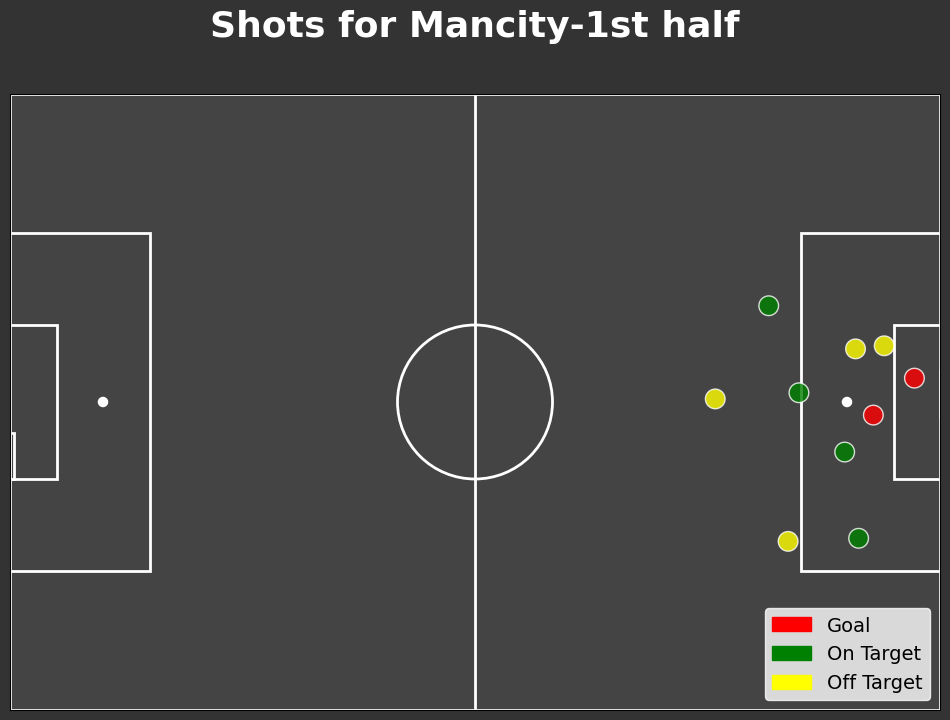

In [60]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as path_effects
import seaborn as sns
import pandas as pd
import mplcursors

# Set the color palette
sns.set_palette('dark')

# Filter for shots in first half
shots = shots_df[(shots_df["team"] == "Manchester City WFC") & (shots_df["period"] == 1)]

# Define pitch dimensions
pitchLengthX = 120
pitchWidthY = 80

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set background color to dark grey
fig.patch.set_facecolor('#333333')

# Draw field with lighter grey
rect = plt.Rectangle((0, 0), pitchLengthX, pitchWidthY, edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
ax.add_patch(rect)

# Draw midfield line and center circle with white color
ax.plot([60, 60], [0, 80], color='white', linewidth=2)
circle = plt.Circle((60, 40), 10, edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
ax.add_patch(circle)

# Draw penalty areas and goal areas with white color
leftPenalty = plt.Polygon([(0, 18), (18, 18), (18, 62), (0, 62)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
rightPenalty = plt.Polygon([(120, 18), (102, 18), (102, 62), (120, 62)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
leftGoal = plt.Polygon([(0, 30), (6, 30), (6, 50), (0, 50)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
rightGoal = plt.Polygon([(120, 30), (114, 30), (114, 50), (120, 50)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
ax.add_patch(leftPenalty)
ax.add_patch(rightPenalty)
ax.add_patch(leftGoal)
ax.add_patch(rightGoal)

# Draw goals with white color
leftPost = plt.Rectangle((0, 44), 0.5, 6, edgecolor='white', facecolor='none', zorder=1, linewidth=2)
rightPost = plt.Rectangle((120, 36), 0.5, 6, edgecolor='white', facecolor='none', zorder=1, linewidth=2)
ax.add_patch(leftPost)
ax.add_patch(rightPost)

# Draw penalty spots with white color
leftPenaltySpot = plt.Circle((12, 40), 0.5, edgecolor='white', facecolor='white', zorder=1, linewidth=2)
rightPenaltySpot = plt.Circle((108, 40), 0.5, edgecolor='white', facecolor='white', zorder=1, linewidth=2)
ax.add_patch(leftPenaltySpot)
ax.add_patch(rightPenaltySpot)

# Set the limits of the pitch
# Set the limits of the pitch
ax.set_xlim([0, pitchLengthX])
ax.set_ylim([0, pitchWidthY])

# Invert the y-axis to match the top left origin
ax.invert_yaxis()
# Create scatter plot with color coding by goals vs no goals
colors = []
for x in shots['outcome']:
    if x == 'Goal':
        colors.append('red')
    elif x == 'Blocked' or x == 'Saved':
        colors.append('green')
    else:
        colors.append('yellow')
ax.scatter(shots['x'], shots['y'], c=colors, edgecolors='white', alpha=0.8, s=200, zorder=3)

# Add legend
goal_patch = mpatches.Patch(color='red', label='Goal')
on_target_patch = mpatches.Patch(color='green', label='On Target')
off_target_patch = mpatches.Patch(color='yellow', label='Off Target')

ax.legend(handles=[goal_patch, on_target_patch, off_target_patch], loc='lower right', fontsize=14, facecolor='white', edgecolor='white')

# Set plot title
ax.set_title('Shots for Mancity-1st half', fontsize=26, fontweight='bold', y=1.08, color='white')

# Remove ticks and axis labels
ax.set_xticks([])
ax.set_yticks([])

plt.show()






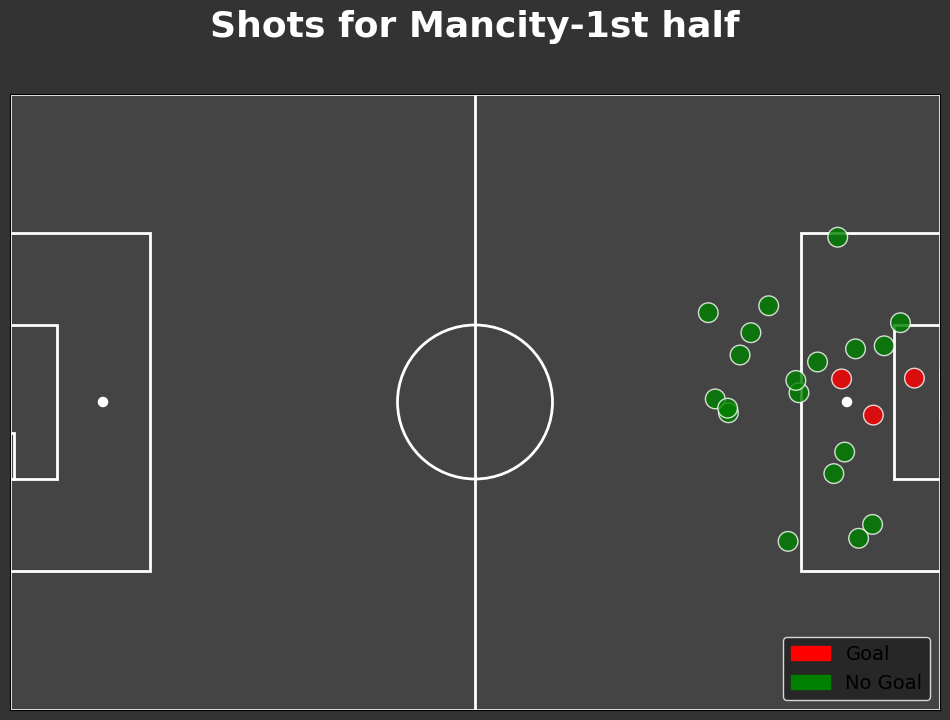

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as path_effects
import seaborn as sns
import pandas as pd


# Set the color palette
sns.set_palette('dark')

# Filter for shots in first half
shots = shots_df

# Define pitch dimensions
pitchLengthX = 120
pitchWidthY = 80

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set background color to dark grey
fig.patch.set_facecolor('#333333')

# Draw field with lighter grey
rect = plt.Rectangle((0, 0), pitchLengthX, pitchWidthY, edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
ax.add_patch(rect)

# Draw midfield line and center circle with white color
ax.plot([60, 60], [0, 80], color='white', linewidth=2)
circle = plt.Circle((60, 40), 10, edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
ax.add_patch(circle)

# Draw penalty areas and goal areas with white color
leftPenalty = plt.Polygon([(0, 18), (18, 18), (18, 62), (0, 62)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
rightPenalty = plt.Polygon([(120, 18), (102, 18), (102, 62), (120, 62)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
leftGoal = plt.Polygon([(0, 30), (6, 30), (6, 50), (0, 50)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
rightGoal = plt.Polygon([(120, 30), (114, 30), (114, 50), (120, 50)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
ax.add_patch(leftPenalty)
ax.add_patch(rightPenalty)
ax.add_patch(leftGoal)
ax.add_patch(rightGoal)

# Draw goals with white color
leftPost = plt.Rectangle((0, 44), 0.5, 6, edgecolor='white', facecolor='none', zorder=1, linewidth=2)
rightPost = plt.Rectangle((120, 36), 0.5, 6, edgecolor='white', facecolor='none', zorder=1, linewidth=2)
ax.add_patch(leftPost)
ax.add_patch(rightPost)

# Draw penalty spots with white color
leftPenaltySpot = plt.Circle((12, 40), 0.5, edgecolor='white', facecolor='white', zorder=1, linewidth=2)
rightPenaltySpot = plt.Circle((108, 40), 0.5, edgecolor='white', facecolor='white', zorder=1, linewidth=2)
ax.add_patch(leftPenaltySpot)
ax.add_patch(rightPenaltySpot)

# Set the limits of the pitch
# Set the limits of the pitch
ax.set_xlim([0, pitchLengthX])
ax.set_ylim([0, pitchWidthY])

# Invert the y-axis to match the top left origin
ax.invert_yaxis()

# Create scatter plot with color coding by goals vs no goals
colors = ['red' if x else 'green' for x in shots['outcome'] == 'Goal']
ax.scatter(shots['x'], shots['y'], c=colors, edgecolors='white', alpha=0.8, s=200, zorder=3)

# Add legend
goal_patch = mpatches.Patch(color='red', label='Goal')
no_goal_patch = mpatches.Patch(color='green', label='No Goal')
ax.legend(handles=[goal_patch, no_goal_patch], loc='lower right', fontsize=14, facecolor='#202020', edgecolor='white')

# Set plot title
ax.set_title('Shots for Mancity-1st half', fontsize=26, fontweight='bold', y=1.08, color='white')

# Remove ticks and axis labels
ax.set_xticks([])
ax.set_yticks([])

plt.show()


In [23]:
Goals = shots_df[(shots_df['outcome'] == 'Goal')]
Goals

,team,player,x,y,outcome,statsbomb_xg,aerial_won,follows_dribble,first_time,open_goal,one_on_one,deflected,technique,shot_shot_assist,shot_goal_assist,body_part,type,period
1,Manchester City WFC,Lauren Hemp,116.7,36.9,Goal,0.626139,None,None,True,True,None,None,Half Volley,None,None,Left Foot,Shot,1
11,Manchester City WFC,Chloe Kelly,111.4,41.7,Goal,0.475549,None,None,True,None,None,None,Normal,None,None,Right Foot,Shot,1
15,Arsenal WFC,Rafaelle Leone Carvalho Souza,107.3,37.0,Goal,0.031398,None,None,None,None,None,None,Normal,None,None,Head,Shot,2


In [24]:
shots_df


,team,player,x,y,outcome,statsbomb_xg,aerial_won,follows_dribble,first_time,open_goal,one_on_one,deflected,technique,shot_shot_assist,shot_goal_assist,body_part,type,period
0,Manchester City WFC,Frida Maanum,91.0,39.6,Off T,0.023783,None,None,None,None,None,None,Normal,None,None,Right Foot,Shot,1
1,Manchester City WFC,Lauren Hemp,116.7,36.9,Goal,0.626139,None,None,True,True,None,None,Half Volley,None,None,Left Foot,Shot,1
2,Arsenal WFC,Caitlin Jade Foord,114.9,29.7,Off T,0.090955,None,None,True,None,None,None,Volley,None,None,Left Foot,Shot,1
3,Arsenal WFC,Kim Little,92.7,41.4,Saved,0.031449,None,None,None,None,None,None,Normal,None,None,Right Foot,Shot,1
4,Manchester City WFC,Khadija Monifa Shaw,109.1,33.1,Wayward,0.054789,True,None,None,None,None,None,Normal,None,None,Head,Shot,1
5,Manchester City WFC,Yui Hasegawa,100.4,58.1,Off T,0.013940,None,None,True,None,None,None,Half Volley,None,None,Right Foot,Shot,1
6,Manchester City WFC,Laia Aleixandri LÃ³pez,112.8,32.7,Off T,0.147453,None,None,True,None,None,None,Half Volley,None,None,Left Foot,Shot,1
7,Manchester City WFC,Khadija Monifa Shaw,107.7,46.5,Saved,0.465857,None,None,None,None,True,None,Normal,None,None,Right Foot,Shot,1
8,Arsenal WFC,Chloe Kelly,111.3,55.9,Saved,0.029694,None,None,None,None,None,None,Normal,None,None,Right Foot,Shot,1
9,Manchester City WFC,Ingrid Filippa Angeldal,97.9,27.5,Saved,0.027609,None,None,None,None,None,None,Normal,None,None,Right Foot,Shot,1


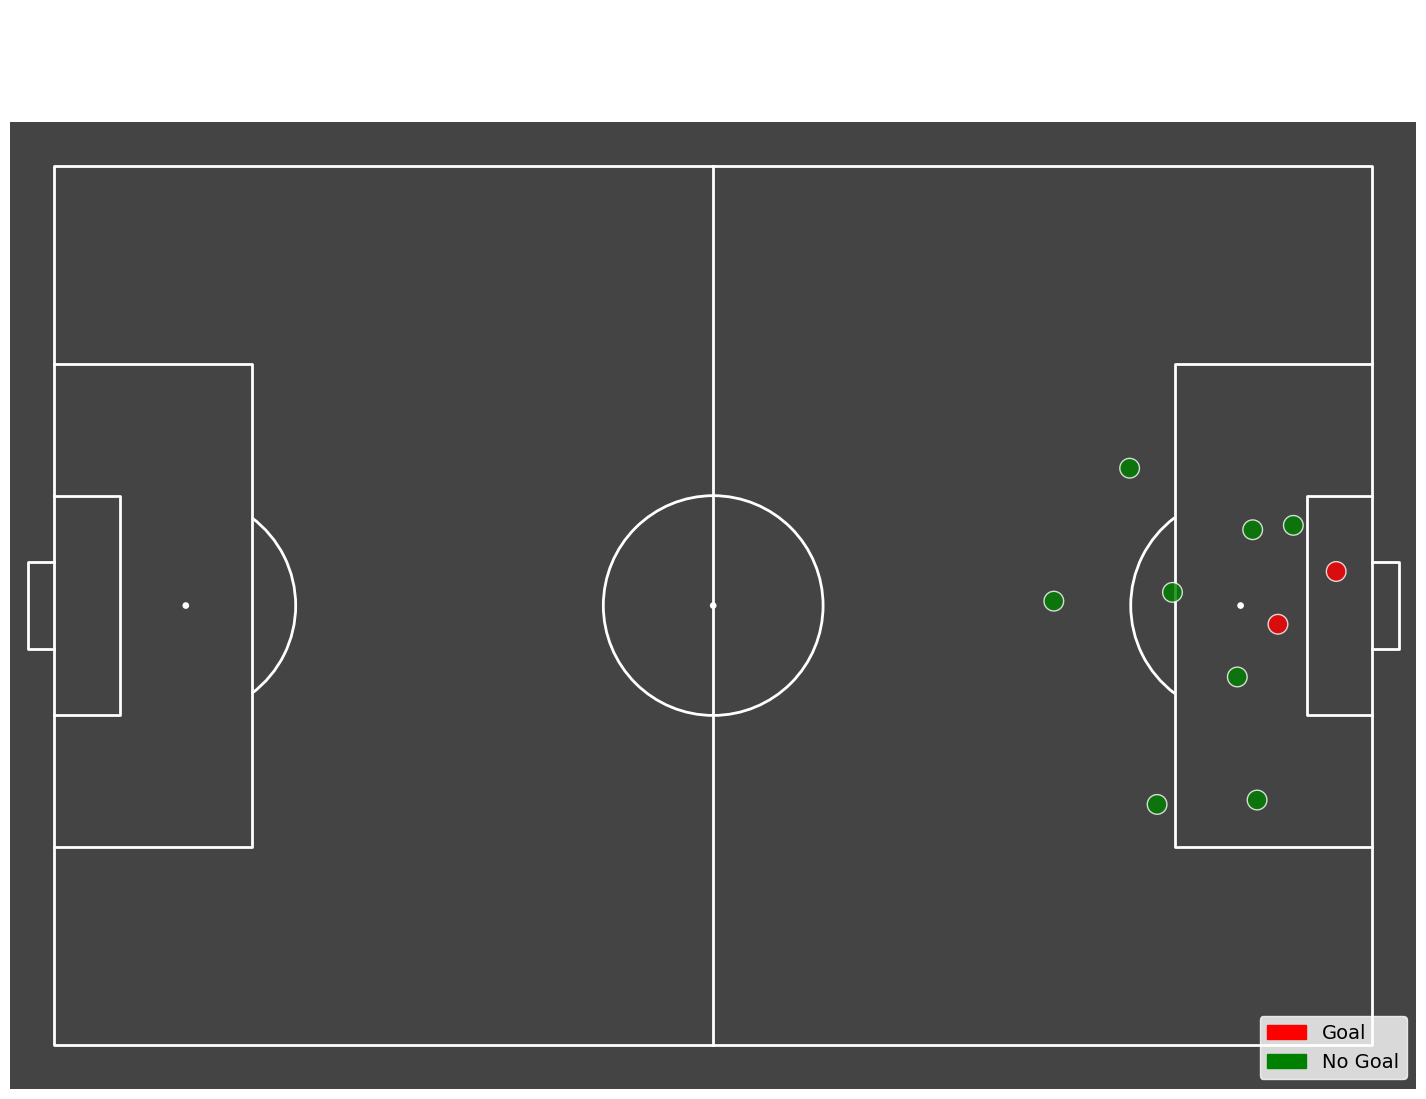

In [27]:

from mplsoccer import Pitch
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define pitch object with desired dimensions and color scheme
pitch = Pitch(pitch_type='statsbomb', line_color='#ffffff', pitch_color='#444444',
              goal_type='box')

# Filter for shots in first half
shots = shots_df[(shots_df["team"] == "Manchester City WFC") & (shots_df["period"] == 1)]

# Create figure and axis using pitch object
fig, ax = pitch.draw(figsize=(16, 11))

# Create scatter plot with color coding by goals vs no goals
colors = ['red' if x else 'green' for x in shots['outcome'] == 'Goal']
ax.scatter(shots['x'], shots['y'], c=colors, edgecolors='white', alpha=0.8, s=200, zorder=3)

# Add legend
goal_patch = mpatches.Patch(color='red', label='Goal')
no_goal_patch = mpatches.Patch(color='green', label='No Goal')
ax.legend(handles=[goal_patch, no_goal_patch], loc='lower right', fontsize=14, facecolor='white', edgecolor='white')

# Set plot title
ax.set_title('Shots for Mancity-1st half', fontsize=26, fontweight='bold', y=1.08, color='white')

# Remove ticks and axis labels
ax.set_xticks([])
ax.set_yticks([])

plt.show()

## Pass Analysis

In [62]:
import numpy as np
# first filter the dataframe to only include passes. Then, we can loop through each pass and look for the next event involving the same team. If the next event is a ball receipt, we can use its location as the ending location of the pass. Otherwise, we can skip that pass since we don't have enough information to estimate its ending location.
passes_df = df[df['type'] == 'Pass']

for i, row in passes_df.iterrows():
    team = row['team']
    player = row['player']
    start_x = row['location_x']
    start_y = row['location_y']
    end_x = np.nan
    end_y = np.nan
    for j in range(i+1, len(df)):
        next_row = df.iloc[j]
        if next_row['team'] == team:
            if next_row['type'] == 'Ball Receipt*':
                end_x = next_row['location_x']
                end_y = next_row['location_y']
                break
        else:
            break
    passes_df.at[i, 'pass_end_location_x'] = end_x
    passes_df.at[i, 'pass_end_location_y'] = end_y


C:\Users\GGGIDWANI\AppData\Local\Temp\ipykernel_28992\2476263906.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_df.at[i, 'pass_end_location_x'] = end_x
C:\Users\GGGIDWANI\AppData\Local\Temp\ipykernel_28992\2476263906.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_df.at[i, 'pass_end_location_y'] = end_y


In [63]:
passes_df #giving successful passes

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,tactics,obv_for_after,obv_for_before,obv_for_net,obv_against_after,obv_against_before,obv_against_net,obv_total_net,pass_end_location_x,pass_end_location_y
4,edbc9819-3d24-4c37-adc0-06949261903b,5,1,00:00:00.280,0,0,Pass,2,Manchester City WFC,From Kick Off,...,None,0.015265,0.007439,0.007826,0.009969,0.008581,0.001388,0.006438,44.4,36.3
7,9fdba1c7-4244-43fd-b0fc-b6f944407c1f,8,1,00:00:02.470,0,2,Pass,2,Manchester City WFC,From Kick Off,...,None,0.013102,0.015399,-0.002296,0.011074,0.009946,0.001129,-0.003425,31.5,55.8
10,5d28c41f-657c-4b5d-8c7d-6975ae7071eb,11,1,00:00:05.155,0,5,Pass,2,Manchester City WFC,From Kick Off,...,None,0.013919,0.013102,0.000816,0.011713,0.011074,0.000638,0.000178,30.5,36.3
13,2a444255-40e1-4690-8780-47996c0a61ef,14,1,00:00:07.595,0,7,Pass,2,Manchester City WFC,From Kick Off,...,None,0.013659,0.013731,-0.000073,0.012090,0.011850,0.000240,-0.000312,NaN,NaN
17,21ad8587-e793-4905-ba99-3eb17330dd86,18,1,00:00:08.371,0,8,Pass,2,Manchester City WFC,From Kick Off,...,None,0.013033,0.015370,-0.002337,0.010823,0.010402,0.000421,-0.002758,32.3,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,c6b9a51c-b035-4a37-870b-b4e5ca084999,3617,2,00:49:19.844,94,19,Pass,190,Manchester City WFC,From Free Kick,...,None,0.017390,0.022831,-0.005441,0.007730,0.008010,-0.000280,-0.005162,100.4,76.8
3619,91f850a6-6301-460f-b018-4b327d2614b2,3620,2,00:49:36.130,94,36,Pass,191,Manchester City WFC,From Throw In,...,None,0.019246,0.017390,0.001856,0.007510,0.007730,-0.000221,0.002077,108.7,77.3
3622,8593ff64-3c81-4554-a4a3-0c0db0dbcfaf,3623,2,00:49:48.101,94,48,Pass,192,Manchester City WFC,From Throw In,...,None,0.013196,0.019246,-0.006050,0.003608,0.007510,-0.003901,-0.002149,NaN,NaN
3623,50a135b5-6199-411e-a77a-9f1364120ed6,3624,2,00:49:49.065,94,49,Pass,192,Manchester City WFC,From Throw In,...,None,0.005570,0.007510,-0.001940,0.013775,0.019246,-0.005471,0.003531,4.0,6.5


C:\Users\GGGIDWANI\AppData\Local\Temp\ipykernel_28992\2912919447.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[player] = plt.cm.get_cmap('tab20')(i)


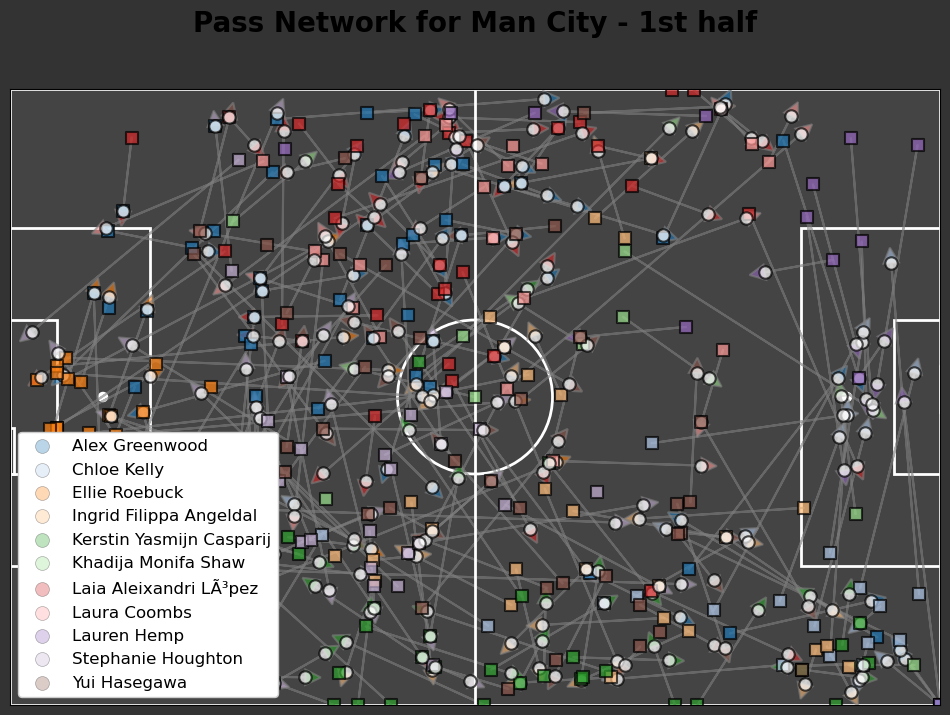

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for Man City in the 1st half
man_city_passes = passes_df[(passes_df['team'] == 'Manchester City WFC') & (passes_df['period'] == 1)]
man_city_passes.reset_index(drop=True, inplace=True)

# Group passes by player
player_passes = man_city_passes.groupby('player').count()['id'].reset_index()
player_passes.rename(columns={'id':'pass_count'}, inplace=True)

# Merge player_passes with man_city_passes to get the locations of the passes
player_passes = pd.merge(player_passes, man_city_passes[['player', 'location_x', 'location_y', 'pass_end_location_x', 'pass_end_location_y', 'possession_team']], on='player', how='left')
player_passes.reset_index(drop=True, inplace=True)

# Define pitch dimensions
pitchLengthX = 120
pitchWidthY = 80

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set background color to dark grey
fig.patch.set_facecolor('#333333')

# Draw field with lighter grey
rect = plt.Rectangle((0, 0), pitchLengthX, pitchWidthY, edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
ax.add_patch(rect)

# Draw midfield line and center circle with white color
ax.plot([60, 60], [0, 80], color='white', linewidth=2)
circle = plt.Circle((60, 40), 10, edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
ax.add_patch(circle)

# Draw penalty areas and goal areas with white color
leftPenalty = plt.Polygon([(0, 18), (18, 18), (18, 62), (0, 62)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
rightPenalty = plt.Polygon([(120, 18), (102, 18), (102, 62), (120, 62)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
leftGoal = plt.Polygon([(0, 30), (6, 30), (6, 50), (0, 50)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
rightGoal = plt.Polygon([(120, 30), (114, 30), (114, 50), (120, 50)], edgecolor='white', facecolor='#444444', zorder=1, linewidth=2)
ax.add_patch(leftPenalty)
ax.add_patch(rightPenalty)
ax.add_patch(leftGoal)
ax.add_patch(rightGoal)

# Draw goals with white color
leftPost = plt.Rectangle((0, 44), 0.5, 6, edgecolor='white', facecolor='none', zorder=1, linewidth=2)
rightPost = plt.Rectangle((120, 36), 0.5, 6, edgecolor='white', facecolor='none', zorder=1, linewidth=2)
ax.add_patch(leftPost)
ax.add_patch(rightPost)

# Draw penalty spots with white color
leftPenaltySpot = plt.Circle((12, 40), 0.5, edgecolor='white', facecolor='white', zorder=1, linewidth=2)
rightPenaltySpot = plt.Circle((108, 40), 0.5, edgecolor='white', facecolor='white', zorder=1, linewidth=2)
ax.add_patch(leftPenaltySpot)
ax.add_patch(rightPenaltySpot)

# Set the limits of the pitch
# Set the limits of the pitch
ax.set_xlim([0, pitchLengthX])
ax.set_ylim([0, pitchWidthY])

# Invert the y-axis to match the top left origin
ax.invert_yaxis()


# Plot the passes for Manchester City
# Create a dictionary to map players to colors
# Create a dictionary to map each player to a unique color
color_dict = {}
for i, player in enumerate(player_passes['player'].unique()):
    color_dict[player] = plt.cm.get_cmap('tab20')(i)

# Create a set to keep track of which players have already been added to the legend
legend_players = set()

# Loop through each player's passes and plot them
for player in player_passes['player'].unique():
    player_passes_subset = player_passes[player_passes['player'] == player].reset_index()
    color = color_dict[player]
    size = 80
    linewidth = 1.5
    for j in range(len(player_passes_subset)):
        x_start = player_passes_subset.loc[j, 'location_x']
        y_start = player_passes_subset.loc[j, 'location_y']
        x_end = player_passes_subset.loc[j, 'pass_end_location_x']
        y_end = player_passes_subset.loc[j, 'pass_end_location_y']

        # Determine arrow direction based on start and end locations
        dx, dy = x_end - x_start, y_end - y_start
            
        # Plot the pass with an arrow
        ax.arrow(x_start, y_start, dx, dy, head_width=2, head_length=2, fc=color, ec='gray', alpha=0.6, linewidth=linewidth, zorder=1)
        
        # Plot the start and end nodes with different marker shapes
        ax.scatter(x_start, y_start, marker='s', color=color, edgecolors='black', linewidth=linewidth, alpha=0.7, s=size, zorder=2)
        ax.scatter(x_end, y_end, marker='o', color='white', edgecolors='black', linewidth=linewidth, alpha=0.7, s=size, zorder=2)

    # Add player name to legend with lower alpha
    if player not in legend_players:
        plt.scatter([], [], marker='o', color=color, edgecolors='black', linewidth=0.5, alpha=0.3, s=100, label=player)
        legend_players.add(player)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.5)

# Add a legend with a readable font
plt.legend(scatterpoints=1, loc='lower left', fontsize=12, framealpha=1, facecolor='white', frameon=True)

# Set plot title with a readable font
ax.set_title('Pass Network for Man City - 1st half', fontsize=20, fontweight='bold', y=1.08)

# Remove ticks and axis labels
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()


In [89]:
man_city_passes

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,tactics,obv_for_after,obv_for_before,obv_for_net,obv_against_after,obv_against_before,obv_against_net,obv_total_net,pass_end_location_x,pass_end_location_y
0,edbc9819-3d24-4c37-adc0-06949261903b,5,1,00:00:00.280,0,0,Pass,2,Manchester City WFC,From Kick Off,...,None,0.015265,0.007439,0.007826,0.009969,0.008581,0.001388,0.006438,44.4,36.3
1,9fdba1c7-4244-43fd-b0fc-b6f944407c1f,8,1,00:00:02.470,0,2,Pass,2,Manchester City WFC,From Kick Off,...,None,0.013102,0.015399,-0.002296,0.011074,0.009946,0.001129,-0.003425,31.5,55.8
2,5d28c41f-657c-4b5d-8c7d-6975ae7071eb,11,1,00:00:05.155,0,5,Pass,2,Manchester City WFC,From Kick Off,...,None,0.013919,0.013102,0.000816,0.011713,0.011074,0.000638,0.000178,30.5,36.3
3,2a444255-40e1-4690-8780-47996c0a61ef,14,1,00:00:07.595,0,7,Pass,2,Manchester City WFC,From Kick Off,...,None,0.013659,0.013731,-0.000073,0.012090,0.011850,0.000240,-0.000312,NaN,NaN
4,21ad8587-e793-4905-ba99-3eb17330dd86,18,1,00:00:08.371,0,8,Pass,2,Manchester City WFC,From Kick Off,...,None,0.013033,0.015370,-0.002337,0.010823,0.010402,0.000421,-0.002758,32.3,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,08724565-fe3c-45d7-ba53-8ea644d4433e,1845,1,00:50:00.381,50,0,Pass,87,Manchester City WFC,From Throw In,...,None,0.012408,0.013759,-0.001351,0.007561,0.008647,-0.001086,-0.000265,NaN,NaN
292,e9a3dff4-52e1-4869-a9ad-d93366f198ce,1868,1,00:50:19.298,50,19,Pass,89,Manchester City WFC,Regular Play,...,None,0.021291,0.021663,-0.000372,0.009298,0.008964,0.000334,-0.000705,NaN,NaN
293,f4efebd5-30b8-4c0b-922e-9a24354e9e20,1874,1,00:50:34.289,50,34,Pass,90,Manchester City WFC,From Free Kick,...,None,0.023927,0.021911,0.002016,0.008664,0.008980,-0.000316,0.002332,86.5,68.6
294,24747345-81e1-4e77-9252-05164f20d4e2,1877,1,00:50:37.387,50,37,Pass,90,Manchester City WFC,From Free Kick,...,None,0.012489,0.026303,-0.013813,0.007125,0.009303,-0.002178,-0.011635,110.0,31.5


In [21]:
passes_df

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,team,player,position,location_x,location_y,duration,under_pressure,off_camera,out,related_events,tactics,obv_for_after,obv_for_before,obv_for_net,obv_against_after,obv_against_before,obv_against_net,obv_total_net,pass_end_location_x,pass_end_location_y
4,edbc9819-3d24-4c37-adc0-06949261903b,5,1,00:00:00.280,0,0,Pass,2,Manchester City WFC,From Kick Off,Manchester City WFC,Khadija Monifa Shaw,Center Forward,60.0,40.0,1.012141,None,None,None,[d951ed07-53b6-412b-9e50-5317a66a7396],None,0.015265,0.007439,7.825949e-03,0.009969,0.008581,1.387902e-03,0.006438,44.4,36.3
7,9fdba1c7-4244-43fd-b0fc-b6f944407c1f,8,1,00:00:02.470,0,2,Pass,2,Manchester City WFC,From Kick Off,Manchester City WFC,Yui Hasegawa,Center Defensive Midfield,45.8,36.1,1.349634,None,None,None,[bc80bce1-2601-4654-aeb2-97dc87c2fee2],None,0.013102,0.015399,-2.296207e-03,0.011074,0.009946,1.128670e-03,-0.003425,31.5,55.8
10,5d28c41f-657c-4b5d-8c7d-6975ae7071eb,11,1,00:00:05.155,0,5,Pass,2,Manchester City WFC,From Kick Off,Manchester City WFC,Stephanie Houghton,Right Center Back,31.5,55.8,1.339383,None,None,None,[0d0262f2-9968-4253-b928-bb389a1370f0],None,0.013919,0.013102,8.163694e-04,0.011713,0.011074,6.383276e-04,0.000178,30.5,36.3
13,2a444255-40e1-4690-8780-47996c0a61ef,14,1,00:00:07.595,0,7,Pass,2,Manchester City WFC,From Kick Off,Manchester City WFC,Alex Greenwood,Left Center Back,30.3,32.1,0.712280,None,None,None,[61e16933-1e5e-4bb3-b6fd-d920c166744e],None,0.013659,0.013731,-7.251090e-05,0.012090,0.011850,2.397466e-04,-0.000312,NaN,NaN
17,21ad8587-e793-4905-ba99-3eb17330dd86,18,1,00:00:08.371,0,8,Pass,2,Manchester City WFC,From Kick Off,Manchester City WFC,Laura Coombs,Left Center Midfield,44.2,28.4,1.524252,None,None,None,[e28f7be2-23d6-4698-8b5a-53e934acdc29],None,0.013033,0.015370,-2.336931e-03,0.010823,0.010402,4.209494e-04,-0.002758,32.3,24.6
20,2501232f-06e7-4981-81af-ae76f925a102,21,1,00:00:10.769,0,10,Pass,2,Manchester City WFC,From Kick Off,Manchester City WFC,Alex Greenwood,Left Center Back,32.3,24.6,1.661833,None,None,None,[8d123f2f-8fbf-4a0a-a25c-12e7258cb998],None,0.012621,0.013033,-4.120022e-04,0.011159,0.010823,3.368929e-04,-0.000749,44.4,8.4
23,02617198-fe3d-4da1-816d-941e46281a73,24,1,00:00:13.483,0,13,Pass,2,Manchester City WFC,From Kick Off,Manchester City WFC,Laia Aleixandri López,Left Back,44.8,7.4,0.936335,None,None,None,[20788550-2009-49fe-ab78-f64763c91d74],None,0.012446,0.012261,1.849923e-04,0.012349,0.010626,1.722672e-03,-0.001538,42.8,17.4
27,eb7aa35f-b5d6-428a-93c6-d4cd8484ecbc,28,1,00:00:15.372,0,15,Pass,2,Manchester City WFC,From Kick Off,Manchester City WFC,Laura Coombs,Left Center Midfield,40.4,22.2,2.689222,None,None,None,[7fcaa846-9738-420f-967d-414a9d8971b2],None,0.013840,0.014386,-5.454710e-04,0.010621,0.011067,-4.462423e-04,-0.000099,36.7,55.4
30,e11e8552-1460-416c-b397-cf43646ea604,31,1,00:00:19.867,0,19,Pass,2,Manchester City WFC,From Kick Off,Manchester City WFC,Kerstin Yasmijn Casparij,Right Back,37.3,60.4,1.795706,None,None,None,[8d5cffea-af7d-41f6-96be-07f092bd884b],None,0.010964,0.013403,-2.438860e-03,0.012430,0.010541,1.888811e-03,-0.004328,21.7,56.8
33,cd0250e0-3d6e-440d-991c-0033e64dc46f,34,1,00:00:23.147,0,23,Pass,2,Manchester City WFC,From Kick Off,Manchester City WFC,Stephanie Houghton,Right Center Back,21.7,56.8,1.987901,None,None,None,[4afae74f-317b-47d0-984c-431cb4b507fd],None,0.009287,0.010964,-1.677660e-03,0.013172,0.012430,7.423470e-04,-0.002420,6.2,34.3


## Average location Pass

In [81]:
import pandas as pd

# Create a copy of the original dataframe with the relevant columns
passes_copy = passes_df[['team', 'player', 'pass_end_location_x', 'pass_end_location_y']].copy()

# Drop rows with missing values
passes_copy.dropna(inplace=True)

# Create a list of all unique player names
players = list(set(passes_copy['player']))

# Create an empty dataframe to store the pass counts
pass_counts = pd.DataFrame(columns=['Player 1', 'Player 2', 'Pass Count'])

# Loop through each pair of players
for i in range(len(players)):
    for j in range(i+1, len(players)):
        # Filter the dataframe to include only passes between these two players
        player1_passes = passes_copy.loc[(passes_copy['player'] == players[i]) & (passes_copy['team'] == 'Manchester City WFC')]
        player2_passes = passes_copy.loc[(passes_copy['player'] == players[j]) & (passes_copy['team'] == 'Manchester City WFC')]
        passes_between_players = pd.concat([player1_passes, player2_passes])
        
        # Calculate the number of passes between the two players in both directions
        pass_count = len(passes_between_players)
        
        # Add the pass count to the dataframe
        pass_counts = pass_counts.append({'Player 1': players[i], 'Player 2': players[j], 'Pass Count': pass_count}, ignore_index=True)
        pass_counts = pass_counts.append({'Player 1': players[j], 'Player 2': players[i], 'Pass Count': pass_count}, ignore_index=True)

# Sort the dataframe by Player 1 and Player 2 names
pass_counts = pass_counts.sort_values(by=['Player 1', 'Player 2'])

# Display the final dataframe
print(pass_counts)


C:\Users\GGGIDWANI\AppData\Local\Temp\ipykernel_28992\2098539911.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pass_counts = pass_counts.append({'Player 1': players[i], 'Player 2': players[j], 'Pass Count': pass_count}, ignore_index=True)
C:\Users\GGGIDWANI\AppData\Local\Temp\ipykernel_28992\2098539911.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pass_counts = pass_counts.append({'Player 1': players[j], 'Player 2': players[i], 'Pass Count': pass_count}, ignore_index=True)
C:\Users\GGGIDWANI\AppData\Local\Temp\ipykernel_28992\2098539911.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pass_counts = pass_counts.append({'Player 1': players[i], 'Player 2': players[j], 'Pass Count': pass_count}, ignore_index=T

           Player 1                       Player 2 Pass Count
331  Alex Greenwood             Caitlin Jade Foord         46
506  Alex Greenwood            Carlotte Wubben-Moy         46
500  Alex Greenwood                    Chloe Kelly         73
401  Alex Greenwood                  Ellie Roebuck         66
514  Alex Greenwood        Emma Stina Blackstenius         46
..              ...                            ...        ...
459    Yui Hasegawa                  Noelle Maritz         61
279    Yui Hasegawa  Rafaelle Leone Carvalho Souza         61
687    Yui Hasegawa             Stephanie Houghton        126
489    Yui Hasegawa         Stephanie-Elise Catley         61
319    Yui Hasegawa                Victoria Pelova         61

[702 rows x 3 columns]


C:\Users\GGGIDWANI\AppData\Local\Temp\ipykernel_28992\2098539911.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pass_counts = pass_counts.append({'Player 1': players[i], 'Player 2': players[j], 'Pass Count': pass_count}, ignore_index=True)
C:\Users\GGGIDWANI\AppData\Local\Temp\ipykernel_28992\2098539911.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pass_counts = pass_counts.append({'Player 1': players[j], 'Player 2': players[i], 'Pass Count': pass_count}, ignore_index=True)
C:\Users\GGGIDWANI\AppData\Local\Temp\ipykernel_28992\2098539911.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pass_counts = pass_counts.append({'Player 1': players[i], 'Player 2': players[j], 'Pass Count': pass_count}, ignore_index=T

In [286]:
mcfc = df_all.loc[(df_all['team.name'] == 'Manchester City WFC') & df_all['period'] == 1]
mcfc2 = df.loc[(df['team'] == 'Manchester City WFC') & df['period'] == 1]

m_pass = mcfc.loc[(mcfc['type.name'] == 'Pass') & (mcfc['pass.recipient.name'].notna())]
m_avg_loc = mcfc2.groupby('player', as_index=False).agg({'location_x':['mean'], 'location_y':['mean']})

m_player_pass = m_pass[['player.name', 'pass.recipient.name']]
m_player_pass_count = m_player_pass.groupby(['player.name', 'pass.recipient.name'], as_index=False).value_counts()
m_per_player_pass_count = m_pass[['player.name']].groupby('player.name', as_index=False).value_counts()
m_player_pass_count.columns = ['player', 'pass_recipient_name', 'pass_count']
m_avg_loc.columns = ['player', 'x', 'y']
m_player_pass_count = m_player_pass_count.merge(m_avg_loc, on='player')
m_avg_loc.columns = ['pass_recipient_name', 'x_end', 'y_end']
m_player_pass_count = m_player_pass_count.merge(m_avg_loc, on='pass_recipient_name')
m_player_pass_count = m_player_pass_count.merge(numbers, on='player')

m_per_player_pass_count
m_player_pass_count.sort_values(by='pass_count', ascending=False).head(15)


,player,pass_recipient_name,pass_count,x,y,x_end,y_end,number
27,Kerstin Yasmijn Casparij,Ingrid Filippa Angeldal,10,61.890110,69.321978,68.587619,55.242857,2
4,Alex Greenwood,Laia Aleixandri LÃ³pez,10,46.539200,27.804800,54.705435,19.134783,5
28,Kerstin Yasmijn Casparij,Stephanie Houghton,9,61.890110,69.321978,36.144860,52.900000,2
25,Ingrid Filippa Angeldal,Kerstin Yasmijn Casparij,9,68.587619,55.242857,61.890110,69.321978,12
61,Yui Hasegawa,Ingrid Filippa Angeldal,9,58.465217,46.572464,68.587619,55.242857,25
29,Kerstin Yasmijn Casparij,Yui Hasegawa,8,61.890110,69.321978,58.465217,46.572464,2
57,Stephanie Houghton,Alex Greenwood,8,36.144860,52.900000,46.539200,27.804800,6
66,Yui Hasegawa,Stephanie Houghton,8,58.465217,46.572464,36.144860,52.900000,25
67,Yui Hasegawa,Alex Greenwood,7,58.465217,46.572464,46.539200,27.804800,25
56,Stephanie Houghton,Yui Hasegawa,7,36.144860,52.900000,58.465217,46.572464,6


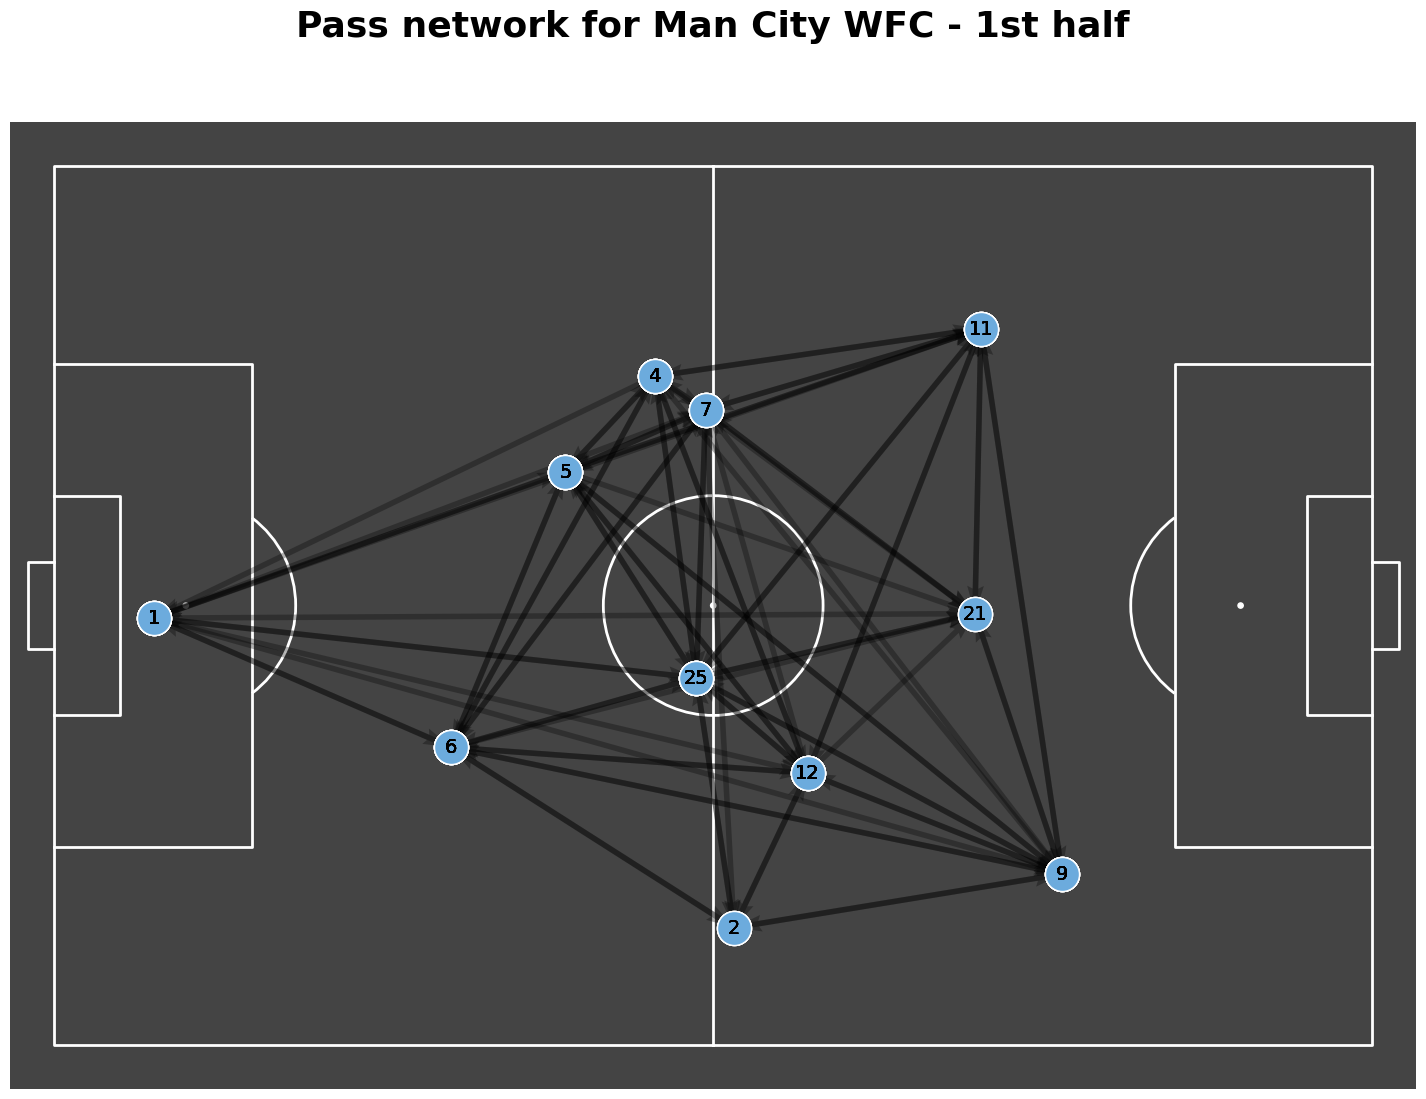

In [283]:
from mplsoccer import Pitch
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define pitch object with desired dimensions and color scheme
pitch = Pitch(pitch_type='statsbomb', line_color='#ffffff', pitch_color='#444444',
              goal_type='box')

# Filter for shots in first half
#shots = shots_df[(shots_df["team"] == "Manchester City WFC") & (shots_df["period"] == 1)]

# Create figure and axis using pitch object
fig, ax = pitch.draw(figsize=(16, 11))


pitch.arrows(m_player_pass_count.x, m_player_pass_count.y,m_player_pass_count.x_end,
             m_player_pass_count.y_end,alpha=0.3,ax=ax)
pitch.scatter(m_player_pass_count.x, m_player_pass_count.y,alpha=1,s=600,color='#6CABDD',edgecolor='white',ax=ax)

for i in range(len(m_player_pass_count)):
    pitch.annotate(m_player_pass_count.number[i], xy=(m_player_pass_count.x[i], m_player_pass_count.y[i]),size=14,va='center',ha='center',ax=ax)
# Create scatter plot with color coding by goals vs no goals
#colors = ['red' if x else 'green' for x in shots['outcome'] == 'Goal']
#ax.scatter(shots['x'], shots['y'], c=colors, edgecolors='white', alpha=0.8, s=200, zorder=3)

# Add legend
#goal_patch = mpatches.Patch(color='red', label='Goal')
#no_goal_patch = mpatches.Patch(color='green', label='No Goal')
#ax.legend(handles=[goal_patch, no_goal_patch], loc='lower right', fontsize=14, facecolor='white', edgecolor='white')

# Set plot title
ax.set_title('Pass network for Man City WFC - 1st half', fontsize=26, fontweight='bold', y=1.08, color='black')

# Remove ticks and axis labels
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [251]:
for i in range(len(m_player_pass_count)):
    print(m_player_pass_count.number[i])

5
5
5
5
5
5
5
5
5
1
1
1
1
1
1
1
1
12
12
12
12
12
12
12
12
12
2
2
2
2
21
21
21
21
4
4
4
4
4
4
4
4
4
11
11
11
11
11
11
11
6
6
6
6
6
6
6
6
6
25
25
25
25
25
25
25
25
25
25
9
9
9
9
9
9
9
9
7
7
7
7
7
7
7


In [45]:
pip install jsonlines

Note: you may need to restart the kernel to use updated packages.


In [46]:
import jsonlines
with open ('C://Users//SHAKISHNANBALAKUMAR//Documents//tracking.jsonl') as f:
    for line in jsonlines.Reader (f):
        data= [obj for obj in jsonlines.Reader(f)]
        
df=pd.json_normalize(data)

FileNotFoundError: [Errno 2] No such file or directory: 'C://Users//SHAKISHNANBALAKUMAR//Documents//tracking.jsonl'

In [ ]:
df.columns

In [113]:
df.head(1)

,period,frameIdx,gameClock,wallClock,homePlayers,awayPlayers,live,lastTouch,ball.xyz,ball.speed
0,1,1,0.04,1676118667920,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...,[{'playerId': '092fcb72-e828-4d76-b7b9-abdf8c0...,True,home,"[-0.82, 0.22, 0.28]",11.61


In [125]:
# Select only the 'period' and 'homePlayers' columns
df = df[['period', 'gameClock','homePlayers']]

# Print the first row of the resulting DataFrame
df.head(1)


,period,gameClock,homePlayers
0,1,0.04,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...


In [150]:
df_period1=df[(df['period'] == 1)]

In [127]:
df_period1.head(30)

,period,gameClock,homePlayers
0,1,0.04,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...
1,1,0.08,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...
2,1,0.12,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...
3,1,0.16,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...
4,1,0.20,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...
5,1,0.24,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...
6,1,0.28,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...
7,1,0.32,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...
8,1,0.36,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...
9,1,0.40,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...


In [128]:
print(df_period1['homePlayers'].dtype)


object


In [44]:
import pandas as pd

# Create a new dataframe with the desired columns
df = pd.DataFrame(columns=['period', 'gameClock', 'playerID', 'number', 'xyz'])

# Create a list to hold the flattened data
data = []

# Iterate over each row in the original dataframe
for index, row in df_period1.iterrows():
    period = row['period']
    gameClock = row['gameClock']
    
    # Iterate over each dictionary in the 'homePlayers' list
    for player in row['homePlayers']:
        playerID = player['playerId']
        number = player['number']
        xyz = player['xyz']
        
        # Add the flattened data to the list
        data.append({
            'period': period,
            'gameClock': gameClock,
            'playerID': playerID,
            'number': number,
            'xyz': xyz
        })
        
    # Print out the size of the dataframe after processing each row
    print(f"Data size: {len(data)}")
    
# Create a dataframe from the list of dictionaries
df = pd.DataFrame(data)


NameError: name 'df_period1' is not defined

In [153]:
# Split the 'xyz' column into separate x, y, and z columns
df[['x', 'y', 'z']] = pd.DataFrame(df['xyz'].tolist(), index=df.index)

# Group the data by playerID and calculate the average x, y, and z locations
avg_locations = df.groupby('playerID').agg({'x': 'mean', 'y': 'mean', 'z': 'mean'})

In [43]:
avg_locations

NameError: name 'avg_locations' is not defined

## loading in player name data

In [155]:
# load JSON data
with open("C://Users//SHAKISHNANBALAKUMAR//OneDrive - Deloitte (O365D)//football//city//ManCity Hackathon Json Files//ManCity Hackathon Json Files//g2312135_SecondSpectrum_meta.json", encoding="utf-8") as file:
    data = json.load(file)
        
df=pd.json_normalize(data)

In [156]:
df

,venueId,description,startTime,year,month,day,pitchLength,pitchWidth,fps,periods,homePlayers,awayPlayers,homeScore,awayScore,ssiId,optaId,optaUuid,tracksVersion,homeSsiId,homeOptaId,homeOptaUuid,awaySsiId,awayOptaId,awayOptaUuid
0,None,MCI-W - ARS-W : 2023-2-11,1676118667880,2023,2,11,105.072182,68.334023,25.0,"[{'number': 1, 'startFrameClock': 167611866788...","[{'name': 'K. Casparij', 'number': 2, 'positio...","[{'name': 'M. Zinsberger', 'number': 1, 'posit...",2,1,135840a0-2f40-4bcc-b5d3-51f4a3df272d,2312135,None,2,edfee15e-0dd7-42bc-be2a-289870187ddc,9660,36tr17foeaf9ejjmt2txuoy3y,a11d34f3-da66-4219-9332-85421e44692f,6272,None


In [157]:
import pandas as pd
# Create a new dataframe with the desired columns
new_df = pd.DataFrame(columns=['name', 'number', 'ssiId'])

# Iterate over each row in the original dataframe
for index, row in df.iterrows():
    # Flatten the 'homePlayers' column
    for player in row['homePlayers']:
        # Add a new row to the new dataframe with the flattened data
        new_df = new_df.append({'name': player['name'],
                                'number': player['number'],
                                'ssiId': player['ssiId']},
                                ignore_index=True)

# Print out the size of the new dataframe
print(f"New dataframe size: {new_df.shape}")


C:\Users\SHAKISHNANBALAKUMAR\AppData\Local\Temp\ipykernel_6080\1158738079.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'name': player['name'],
C:\Users\SHAKISHNANBALAKUMAR\AppData\Local\Temp\ipykernel_6080\1158738079.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'name': player['name'],
C:\Users\SHAKISHNANBALAKUMAR\AppData\Local\Temp\ipykernel_6080\1158738079.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'name': player['name'],
C:\Users\SHAKISHNANBALAKUMAR\AppData\Local\Temp\ipykernel_6080\1158738079.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

New dataframe size: (17, 3)


C:\Users\SHAKISHNANBALAKUMAR\AppData\Local\Temp\ipykernel_6080\1158738079.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'name': player['name'],
C:\Users\SHAKISHNANBALAKUMAR\AppData\Local\Temp\ipykernel_6080\1158738079.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'name': player['name'],
C:\Users\SHAKISHNANBALAKUMAR\AppData\Local\Temp\ipykernel_6080\1158738079.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'name': player['name'],
C:\Users\SHAKISHNANBALAKUMAR\AppData\Local\Temp\ipykernel_6080\1158738079.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

In [158]:
new_df

,name,number,ssiId
0,K. Casparij,2,8c34093f-843c-41a4-b02d-1ed289de00a3
1,E. Roebuck,1,3706abe8-9aba-49c6-8a8f-4f4ef2a9be70
2,Julie Blakstad,41,1027258f-9b54-4cbf-b221-8ab62c169e08
3,L. Aleixandri,4,eb23d9b0-cf56-4eb2-9a72-0022f70e3125
4,C. Kelly,9,08d71d20-85ad-4d98-8bc0-36b8e39e517a
5,D. Castellanos,10,1b3bd37a-8d98-4834-8d8f-072e2038e7c4
6,H. Raso,13,87dbfea7-b4c1-49ce-b210-6210f5efae55
7,A. Greenwood,5,a5ec6d76-4788-4894-bea2-0a165d4a36ba
8,S. Houghton,6,aa53177e-f36d-4298-9c67-3c93a49c3325
9,L. Hemp,11,db47bb9a-634f-4ef6-9cd0-d6daf74164d7


In [159]:
new_df = new_df.rename(columns={'ssiId': 'playerID'})

In [160]:
merged_df = pd.merge(avg_locations, new_df, on='playerID')
merged_df

,playerID,x,y,z,name,number
0,0746befc-a701-4b33-8faf-b3cccccf17bb,-2.736583,-4.838791,0.0,Y. Hasegawa,25
1,08d71d20-85ad-4d98-8bc0-36b8e39e517a,11.783489,-17.550626,0.0,C. Kelly,9
2,1ab5dc11-1e32-4e6b-a385-5b736ec14763,5.819881,4.556269,0.0,L. Coombs,7
3,3706abe8-9aba-49c6-8a8f-4f4ef2a9be70,-38.197893,-0.533775,0.0,E. Roebuck,1
4,471aedfa-df6f-44b4-b008-7b2cef31f3cb,3.755401,-8.278138,0.0,Filippa Angeldahl,12
5,724f3280-015e-440e-b9b7-0598833e9c2d,15.149145,-2.993811,0.0,Khadija Shaw,21
6,8c34093f-843c-41a4-b02d-1ed289de00a3,-8.432525,-17.906047,0.0,K. Casparij,2
7,a5ec6d76-4788-4894-bea2-0a165d4a36ba,-10.456173,1.724815,0.0,A. Greenwood,5
8,aa53177e-f36d-4298-9c67-3c93a49c3325,-11.314224,-7.914275,0.0,S. Houghton,6
9,db47bb9a-634f-4ef6-9cd0-d6daf74164d7,13.360086,14.776570,0.0,L. Hemp,11


In [168]:
pass_counts

,Player 1,Player 2,Pass Count
407,Alex Greenwood,Caitlin Jade Foord,46
578,Alex Greenwood,Carlotte Wubben-Moy,46
439,Alex Greenwood,Chloe Kelly,73
127,Alex Greenwood,Ellie Roebuck,66
29,Alex Greenwood,Emma Stina Blackstenius,46
580,Alex Greenwood,Frida Maanum,46
337,Alex Greenwood,Giovana Queiroz Costa,46
79,Alex Greenwood,Ingrid Filippa Angeldal,85
299,Alex Greenwood,Kathrine Møller Kühl,46
523,Alex Greenwood,Katie McCabe,46


In [205]:
with open('StatsBomb/StatsBomb/Data/ManCity_Arsenal_lineups.json') as file:
    lineup_data = json.load(file)
lineup = pd.DataFrame(lineup_data)
opponent = lineup.iloc[1,1]
lineup

,team_id,team_name,lineup,formations,events
0,746,Manchester City WFC,"[{'player_id': 4637, 'player_name': 'Ellie Roe...","[{'period': 1, 'timestamp': '00:00:00.000', 'r...","[{'period': 1, 'timestamp': '00:00:00.000', 't..."
1,968,Arsenal WFC,"[{'player_id': 5000, 'player_name': 'Stephanie...","[{'period': 1, 'timestamp': '00:00:00.000', 'r...","[{'period': 1, 'timestamp': '00:00:00.000', 't..."


In [77]:
shots_mcfc = len(shots_df.loc[shots_df['team'] == 'Manchester City WFC'])
shots_opp = len(shots_df.loc[shots_df['team'] == opponent])
xg_mcfc = shots_df.loc[shots_df['team'] == 'Manchester City WFC']['statsbomb_xg']
xg_opp = shots_df.loc[shots_df['team'] == opponent]['statsbomb_xg']
goals_mcfc = len(shots_df.loc[(shots_df['team'] == 'Manchester City WFC') & (shots_df['outcome'] == 'Goal')])
goals_opp = len(shots_df.loc[(shots_df['team'] == opponent) & (shots_df['outcome'] == 'Goal')])
sot_mcfc = len(shots_df.loc[((shots_df['team'] == 'Manchester City WFC') & (shots_df['outcome'] == 'Goal')) | ((shots_df['team'] == 'Manchester City WFC') & (shots_df['outcome'] == 'Blocked')) | ((shots_df['team'] == 'Manchester City WFC') & (shots_df['outcome'] == 'Saved'))])
sot_opp = len(shots_df.loc[((shots_df['team'] == opponent) & (shots_df['outcome'] == 'Goal')) | ((shots_df['team'] == opponent) & (shots_df['outcome'] == 'Blocked')) | ((shots_df['team'] == opponent) & (shots_df['outcome'] == 'Saved'))])
foul_mcfc = len(df.loc[(df['type'] == 'Foul Committed') & (df['team'] == 'Manchester City WFC')])
foul_opp = len(df.loc[(df['type'] == 'Foul Committed') & (df['team'] == opponent)])

#Match stats table
stats = {
    'Goals': [goals_mcfc,goals_opp],
    'Expected Goals (XG)': [xg_mcfc.sum(),xg_opp.sum()],
    'Shots': [shots_mcfc,shots_opp],
    'Shots on Target': [sot_mcfc,sot_opp],
    'Shot Conversion (%)': [(100*sot_mcfc/shots_mcfc),(100*sot_opp/shots_opp)],
    'Fouls': [foul_mcfc, foul_opp],
    'Yellow Cards': [], # or bookings
    'Corners': [],
    'Offsides': [],
    'Possession': []
    
}
stats_df = df.from_dict(stats, orient='index', columns = ['Manchester City WFC',opponent])
stats_df.round(2)


,Manchester City WFC,Arsenal WFC
Goals,2.00,1.00
Expected Goals (XG),2.22,0.41
Shots,16.00,6.00
Shots on Target,8.00,4.00
Shot Conversion (%),50.00,66.67
Fouls,10.00,12.00
Yellow Cards,NaN,NaN
Corners,NaN,NaN
Offsides,NaN,NaN
Possession,NaN,NaN


In [74]:
xg_mcfc.sum()

2.2156557560000003